In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [7]:
train['Dates'] = train['Dates'].astype('datetime64')

In [8]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [10]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [11]:
test['Dates'] = test['Dates'].astype('datetime64')

In [12]:
test['year'] = test['Dates'].dt.year
test['month'] = test['Dates'].dt.month
test['day'] = test['Dates'].dt.day
test['dayofweek'] = test['Dates'].dt.dayofweek
test['hour'] = test['Dates'].dt.hour
test['minute'] = test['Dates'].dt.minute

In [13]:
train['X+Y'] = train['X'] + train['Y']
train['X-Y'] = train['X'] - train['Y']

In [14]:
test['X+Y'] = test['X'] + test['Y']
test['X-Y'] = test['X'] - test['Y']

In [15]:
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x: x.days)
test['n_days'] = (test['Dates'].dt.date - test['Dates'].dt.date.min()).apply(lambda x: x.days)

In [16]:
result = train['Category']

In [17]:
pd.value_counts(train['year']).sort_index()

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

In [18]:
pd.value_counts(train['month']).sort_index()

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: month, dtype: int64

In [19]:
train.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

In [20]:
pd.value_counts(train['dayofweek']).sort_index()

0    121584
1    124965
2    129211
3    125038
4    133734
5    126810
6    116707
Name: dayofweek, dtype: int64

In [21]:
pd.value_counts(train['Category'])

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [22]:
train.isnull().any().sum()

0

In [23]:
train.drop(['Dates','Descript','DayOfWeek','Resolution'], axis=1, inplace=True)

In [24]:
test.isnull().any().sum()

0

In [25]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,6,23,51,-84.659091,-160.123955,4512
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,6,23,50,-84.633790,-160.218214,4512
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512


In [26]:
train.head()

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510


In [27]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,6,23,51,-84.659091,-160.123955,4512
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,6,23,50,-84.633790,-160.218214,4512
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512


In [28]:
test.drop(['Id', 'Dates', 'DayOfWeek'], axis=1, inplace=True)

<AxesSubplot:xlabel='month'>

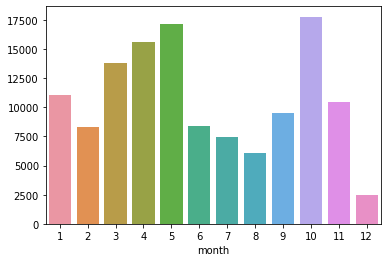

In [29]:
sns.barplot(x=train.groupby('month').size().index, y=train.groupby('month').size().values -62500)

<AxesSubplot:xlabel='year'>

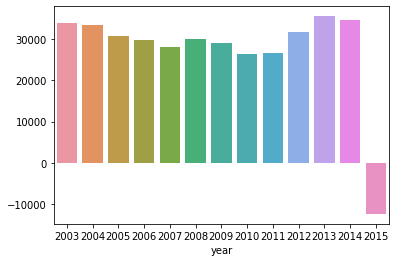

In [30]:
sns.barplot(x=train.groupby('year').size().index, y=train.groupby('year').size().values-40000)

<AxesSubplot:xlabel='day'>

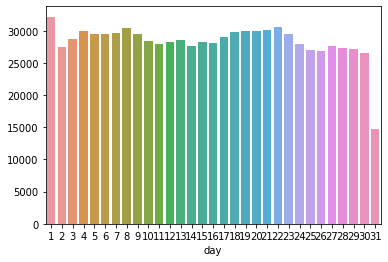

In [31]:
sns.barplot(x=train.groupby('day').size().index, y=train.groupby('day').size().values)

<AxesSubplot:xlabel='dayofweek'>

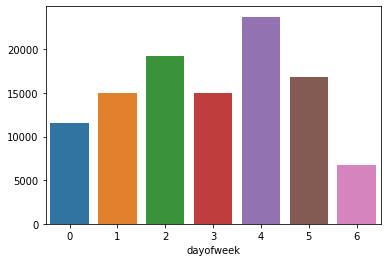

In [32]:
sns.barplot(x=train.groupby('dayofweek').size().index, y=train.groupby('dayofweek').size().values-110000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BAD CHECKS'),
  Text(3, 0, 'BRIBERY'),
  Text(4, 0, 'BURGLARY'),
  Text(5, 0, 'DISORDERLY CONDUCT'),
  Text(6, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(7, 0, 'DRUG/NARCOTIC'),
  Text(8, 0, 'DRUNKENNESS'),
  Text(9, 0, 'EMBEZZLEMENT'),
  Text(10, 0, 'EXTORTION'),
  Text(11, 0, 'FAMILY OFFENSES'),
  Text(12, 0, 'FORGERY/COUNTERFEITING'),
  Text(13, 0, 'FRAUD'),
  Text(14, 0, 'GAMBLING'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LARCENY/THEFT'),
  Text(17, 0, 'LIQUOR LAWS'),
  Text(18, 0, 'LOITERING'),
  Text(19, 0, 'MISSING PERSON'),
  Text(20, 0, 'NON-CRIMINAL'),
  Text(21, 0, 'OTHER OFFENSES'),
  Text(22, 0, 'PORNOGRAPHY/OBSCENE MAT'),
  Text(23, 0, 'PROSTITUTION'),
  Text(24, 0, 'RECOVERED VEHICLE'),
  Text(25, 0, 'ROBBERY'),
  Text(26, 0, '

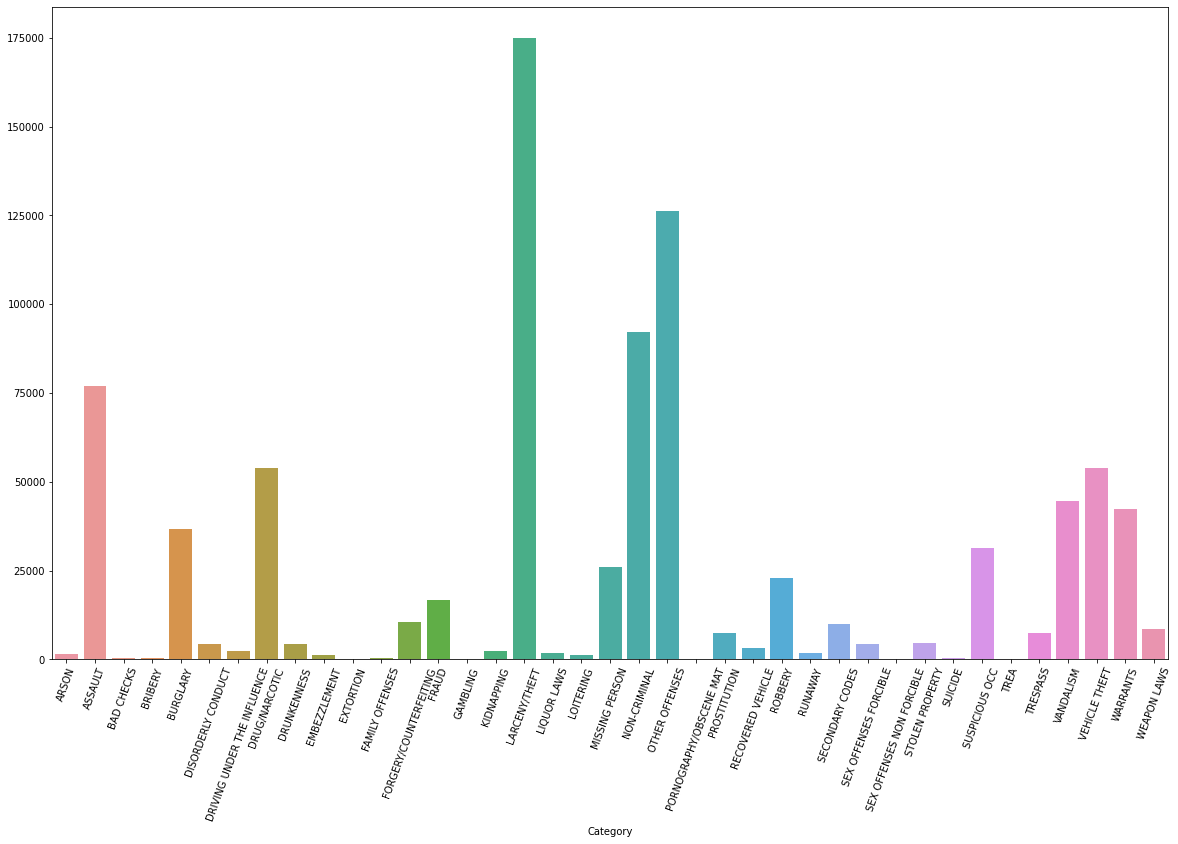

In [33]:
plt.subplots(figsize=(20, 12))
sns.barplot(x=train.groupby('Category').size().index,
            y=train.groupby('Category').size().values)
plt.xticks(rotation=70)


In [34]:
train

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0,15,-84.744977,-160.173089,0
878045,LARCENY/THEFT,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0,1,-84.715416,-160.179311,0
878046,LARCENY/THEFT,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0,1,-84.623125,-160.183656,0
878047,VANDALISM,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0,1,-84.609924,-160.171138,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BAD CHECKS'),
  Text(3, 0, 'BRIBERY'),
  Text(4, 0, 'BURGLARY'),
  Text(5, 0, 'DISORDERLY CONDUCT'),
  Text(6, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(7, 0, 'DRUG/NARCOTIC'),
  Text(8, 0, 'DRUNKENNESS'),
  Text(9, 0, 'EMBEZZLEMENT'),
  Text(10, 0, 'EXTORTION'),
  Text(11, 0, 'FAMILY OFFENSES'),
  Text(12, 0, 'FORGERY/COUNTERFEITING'),
  Text(13, 0, 'FRAUD'),
  Text(14, 0, 'GAMBLING'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LARCENY/THEFT'),
  Text(17, 0, 'LIQUOR LAWS'),
  Text(18, 0, 'LOITERING'),
  Text(19, 0, 'MISSING PERSON'),
  Text(20, 0, 'NON-CRIMINAL'),
  Text(21, 0, 'OTHER OFFENSES'),
  Text(22, 0, 'PORNOGRAPHY/OBSCENE MAT'),
  Text(23, 0, 'PROSTITUTION'),
  Text(24, 0, 'RECOVERED VEHICLE'),
  Text(25, 0, 'ROBBERY'),
  Text(26, 0, '

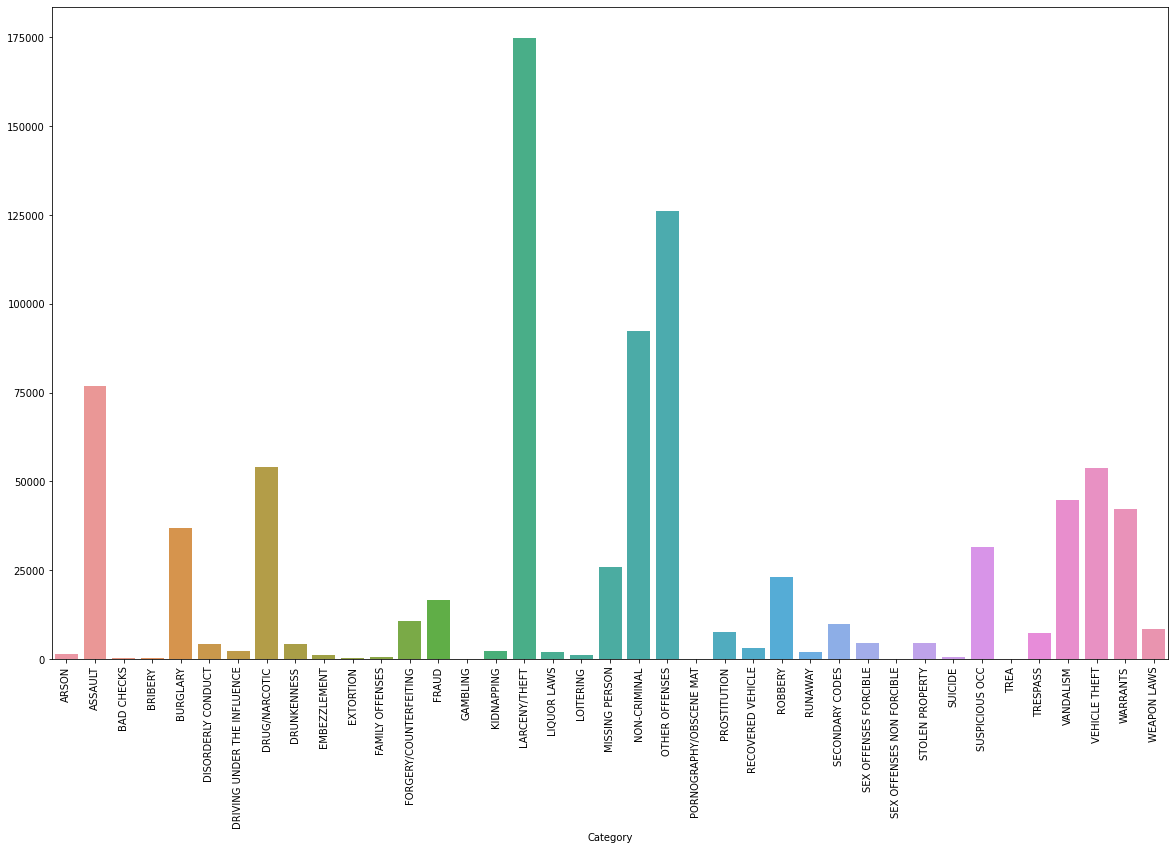

In [35]:
plt.subplots(figsize = (20, 12))
sns.barplot(x=train.groupby('Category').size().index, y=train.groupby('Category').size().values)
plt.xticks(rotation=90)


In [36]:
train.shape

(878049, 14)

In [37]:
result.shape

(878049,)

In [38]:
submission.shape

(884262, 40)

In [39]:
test.shape

(884262, 13)

In [40]:
test.head()

,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512
1,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,6,23,51,-84.659091,-160.123955,4512
2,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,6,23,50,-84.633790,-160.218214,4512
3,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512
4,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,6,23,45,-84.715982,-160.158806,4512


In [41]:
submission.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
from sklearn.preprocessing import LabelEncoder


In [43]:
cat_encoder = LabelEncoder()
train['Category_encoded'] = cat_encoder.fit_transform(train['Category'])


In [44]:
result = train['Category_encoded']


In [45]:
train.head(1)

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days,Category_encoded
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.20049,4510,37


In [46]:
day_encoder = LabelEncoder()
train['DayOfWeek_encoded'] = day_encoder.fit_transform(train['dayofweek'])
test['DayOfWeek_encoded'] = day_encoder.fit_transform(test['dayofweek'])


In [47]:

pdDistrict_encoder = LabelEncoder()
train['PdDistrict_encoded'] = pdDistrict_encoder.fit_transform(
    train['PdDistrict'])
test['PdDistrict_encoded'] = pdDistrict_encoder.fit_transform(
    test['PdDistrict'])


In [48]:
address_encoder = LabelEncoder()
train['Address_encoded'] = address_encoder.fit_transform(train['Address'])
test['Address_encoded'] = address_encoder.fit_transform(test['Address'])


In [49]:
from sklearn.neighbors import KNeighborsClassifier


In [50]:
X = train[['year', 'month', 'hour',
           'DayOfWeek_encoded', 'PdDistrict_encoded']]


In [51]:
knn_model = KNeighborsClassifier(n_neighbors=100)

knn_model.fit(X, result)


KNeighborsClassifier(n_neighbors=100)

In [52]:
test.head(1)

,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days,DayOfWeek_encoded,PdDistrict_encoded,Address_encoded
0,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,6,23,59,-84.664537,-160.134639,4512,6,0,6407


In [53]:
X_test = test[['year', 'month', 'hour','DayOfWeek_encoded', 'PdDistrict_encoded']]


In [54]:
y_test = knn_model.predict(X_test)


In [55]:
submission.head(2)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
submission.WARRANTS = 0

In [57]:
submission.head(2)


,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
for index, row in submission.iterrows():    
    category_index = y_test[index]+1
    row.iloc[category_index] = 1
    


In [63]:
submission.to_csv('submission_knn.csv', index=False)